<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

Importamos modulos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/Index2018.csv'
raw_csv_data = pd.read_csv(url)
df_comp=raw_csv_data.copy()

#### Breve resumen del dataset


In [ ]:
df_comp.spx.mean()

1288.6425471322289

In [ ]:
df_comp.head(10)

,date,spx,dax,ftse,nikkei
0,7/1/1994,469.90,2224.95,3445.98,18124.01
1,10/1/1994,475.27,2225.00,3440.58,18443.44
2,11/1/1994,474.13,2228.10,3413.77,18485.25
3,12/1/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
5,14/01/1994,474.91,2151.05,3400.56,18973.70
6,17/01/1994,473.30,2115.56,3407.83,18725.37
7,18/01/1994,474.25,2130.35,3437.01,18514.55
8,19/01/1994,474.30,2132.52,3475.15,19039.40
9,20/01/1994,474.98,2098.36,3469.99,19183.92


In [ ]:
df_comp.date.describe()

count         6277
unique        6277
top       7/1/1994
freq             1
Name: date, dtype: object

In [ ]:
df_comp.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [ ]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [ ]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df_comp.date.describe()

count                    6277
unique                   6277
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
df_comp.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

Seteamos como index del dataset segun el dia

In [ ]:
df_comp.set_index("date")

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [ ]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

- h: por hora
- w: semanal
- d: diario
- m: mensual
- b: dias laborables



In [ ]:
df_comp=df_comp.asfreq('d')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [ ]:
df_comp=df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [ ]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

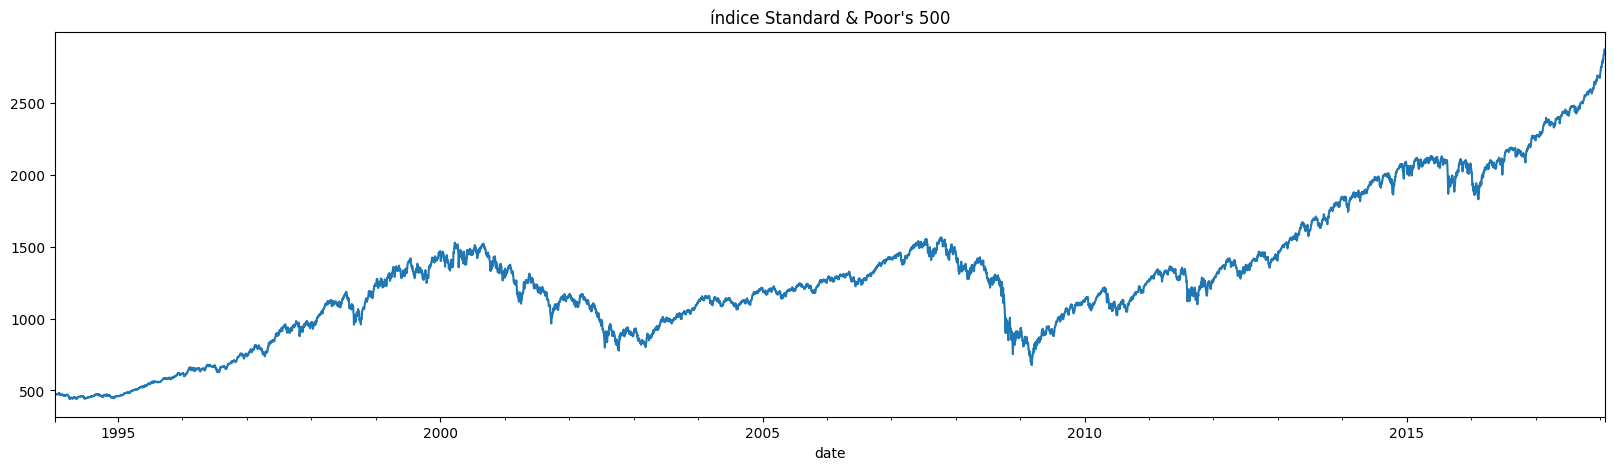

In [ ]:
df_comp.spx.plot(figsize=(20,5), title = "índice Standard & Poor's 500")
plt.show()

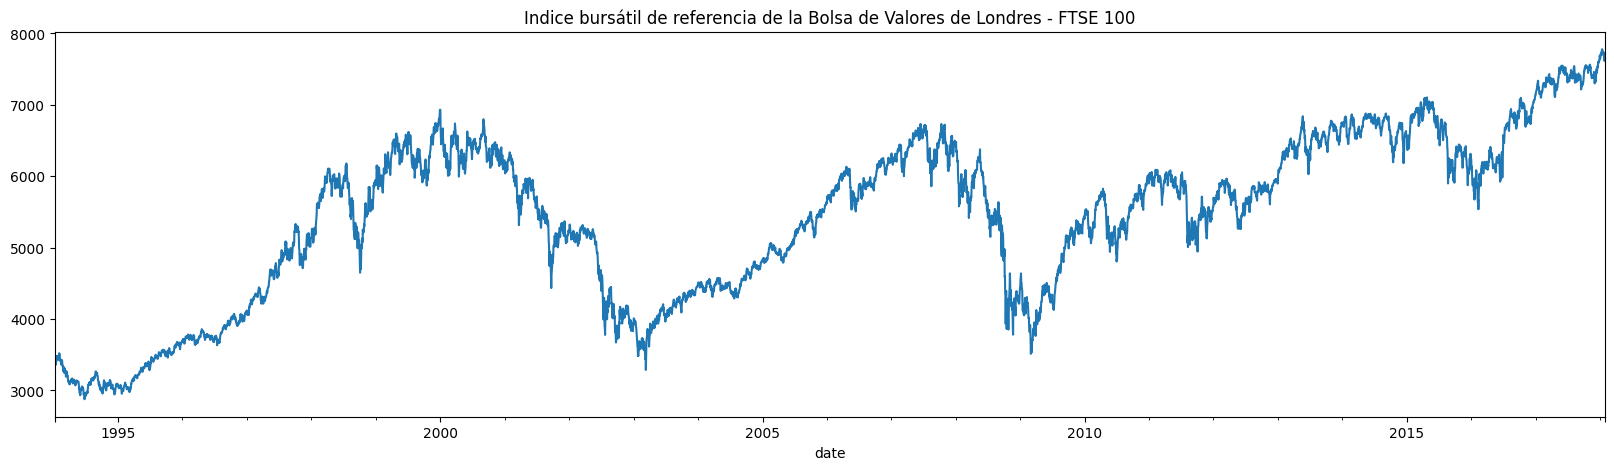

In [ ]:
df_comp.ftse.plot(figsize=(20,5), title = "Indice bursátil de referencia de la Bolsa de Valores de Londres - FTSE 100")
plt.show()

*COMENTARIO NUEVO 1*

El grafico hace referencia al indice bursatil de la bolsa de valores de Londres. Es una primera visualizacion de una serie de tiempo, por lo tanto, vemos los valores que toma en cada momento desde 1994 hasta 2018. Los procesos de precios, por lo general, tienen un comportamiento "RANDOM WALK" ( camino aleatorio ) . El mismo  es un proceso en el que una variable cambia de manera aleatoria en cada paso de tiempo, sin seguir un patrón predecible. Es un modelo que representa cambios impredecibles en datos a lo largo del tiempo.

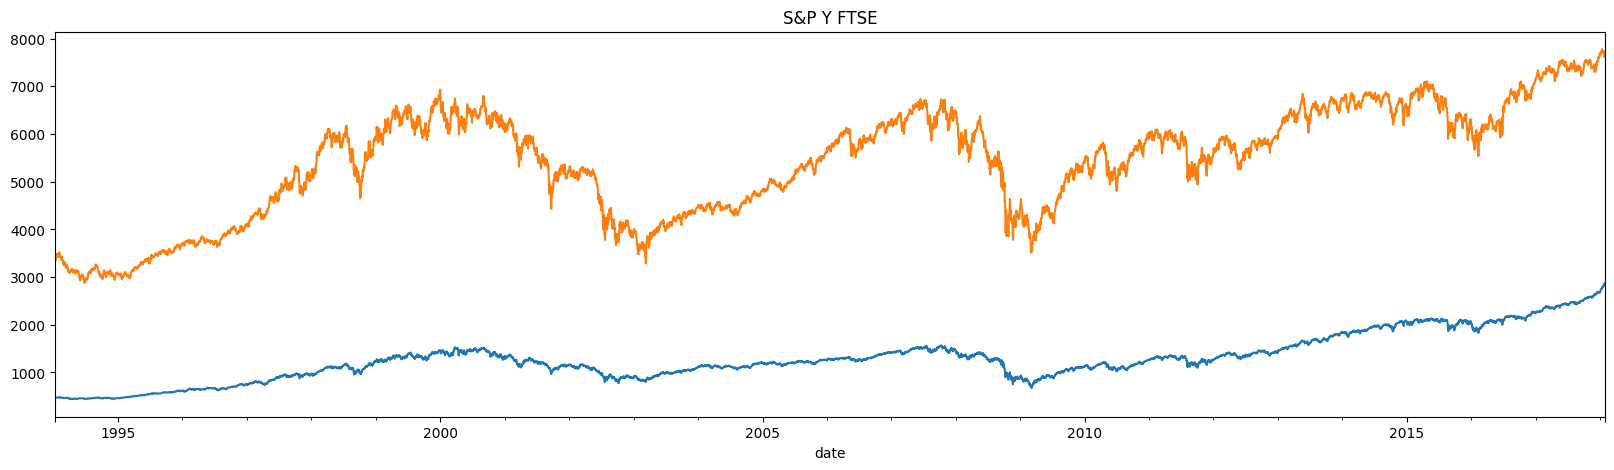

In [ ]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.title("S&P Y FTSE")
plt.show()

Descomposición de Series Temporales

In [ ]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

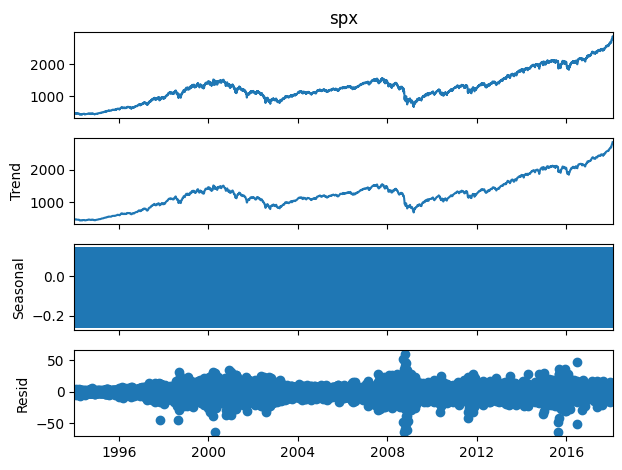

In [ ]:
s_dec_additive = seasonal_decompose(df_comp.spx, model = "adittive")
s_dec_additive.plot()
plt.show()

*COMENTARIO NUEVO 2*

Al hacer la descomposicion de la serie se pueden observar 4 caracteristicas =
- El ciclo
- La tendecia   
- La estacionalidad  ---> la serie no presenta esta caracteristica. Por ello, se ve asi la grafica.
- Movimientoes irregulares ( el error )

Para mayor informacion, tanto la tendencia como la estacionalidad son componentes de NO estacionariedad. ( dicho termino, se analizara en detalle en las proximos clases )

Descomposicion Multiplicativa

In [ ]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

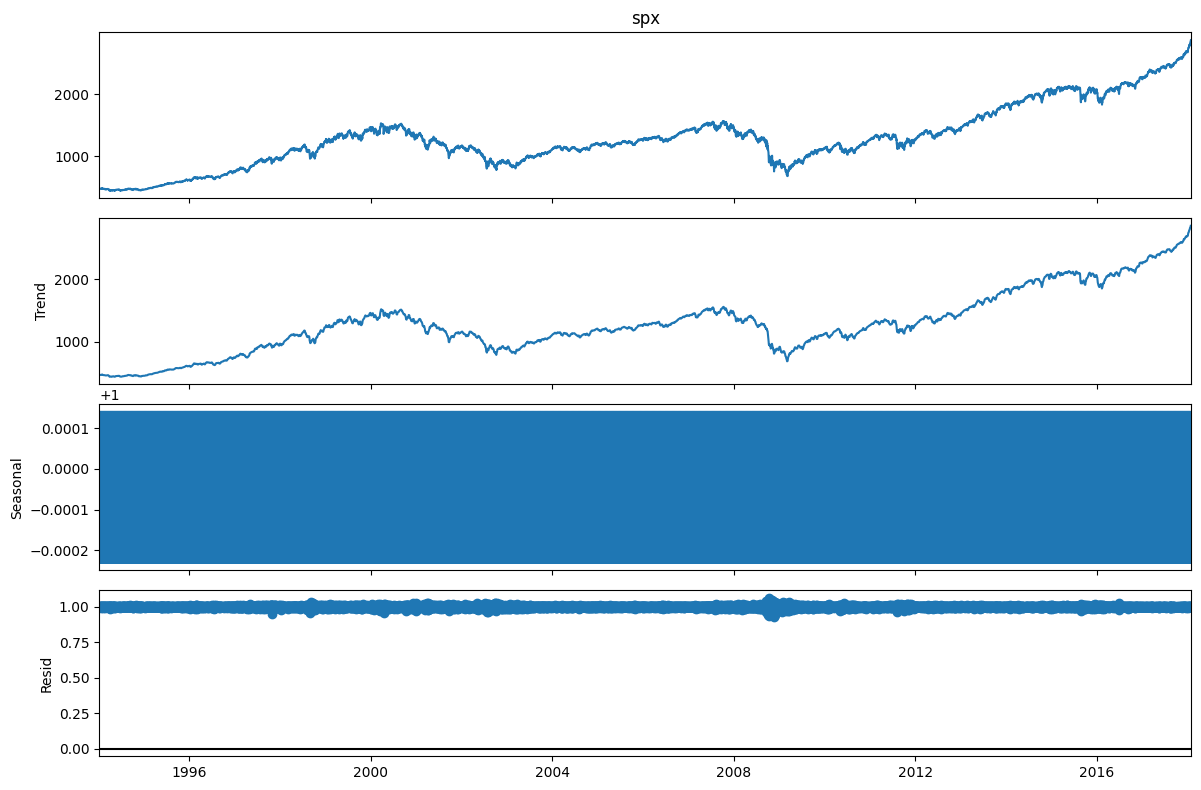

In [ ]:
s_dec_multiplicative = seasonal_decompose(df_comp.spx, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Representación gráfica de la Función de Autocorrelación

In [ ]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [ ]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF del indice Standard & Poor's 500 (SPX)

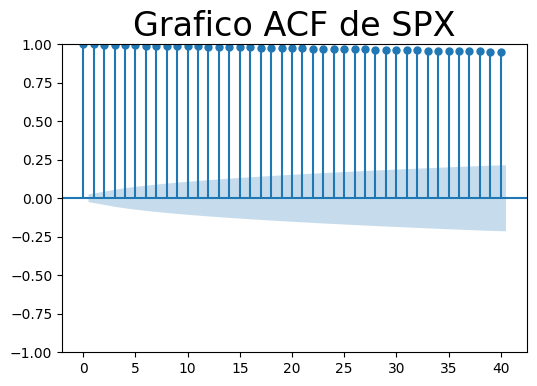

In [ ]:
plot_acf(df_comp.spx,lags=40)
plt.title("Grafico ACF de SPX", size= 24)
plt.show()

*COMENTARIO NUEVO 3*

El grafico es el llamado de autocorrelacion. En el mismo, nos da una primera aproximacion de estacionariedad o no estacionariedad (recuerden que es una primera aproximacion, no definitiva, que luego se testea para confirmar ) .

En este caso, la grafica presenta signos de no estacionarieda. Ya que tiene un decrecimiento lineal que no llega a bajar en el tiempo.

Grafico ACF del indice "DAX"

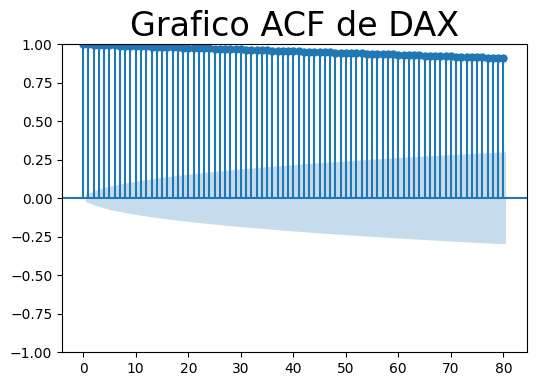

In [ ]:
plot_acf(df_comp.dax,lags=80)
plt.title("Grafico ACF de DAX", size= 24)
plt.show()

Grafico ACF del indice "ftse"

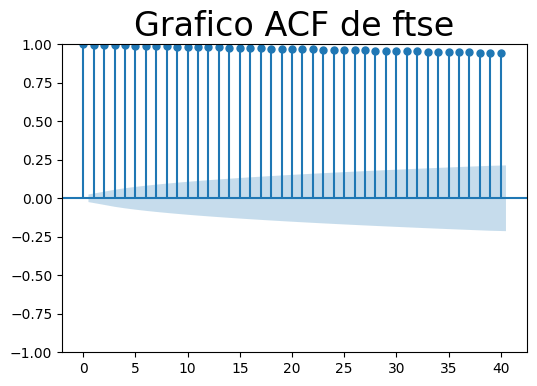

In [ ]:
plot_acf(df_comp.ftse,lags=40)
plt.title("Grafico ACF de ftse", size= 24)
plt.show()

Grafico ACF del indice "nikkei"

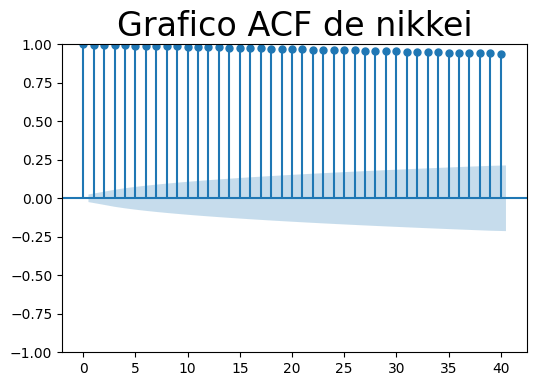

In [ ]:
plot_acf(df_comp.nikkei,lags=40)
plt.title("Grafico ACF de nikkei", size= 24)
plt.show()

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [ ]:
primera_diffs=df_comp.spx.values[1:]-df_comp.spx.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [ ]:
df_comp['primera_diffs_spx']=primera_diffs

In [ ]:
df_comp.head()

,spx,dax,ftse,nikkei,primera_diffs_spx
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,5.37
1994-01-10,475.27,2225.00,3440.58,18443.44,-1.14
1994-01-11,474.13,2228.10,3413.77,18485.25,0.04
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.70
1994-01-13,472.47,2142.37,3360.01,18577.26,2.44


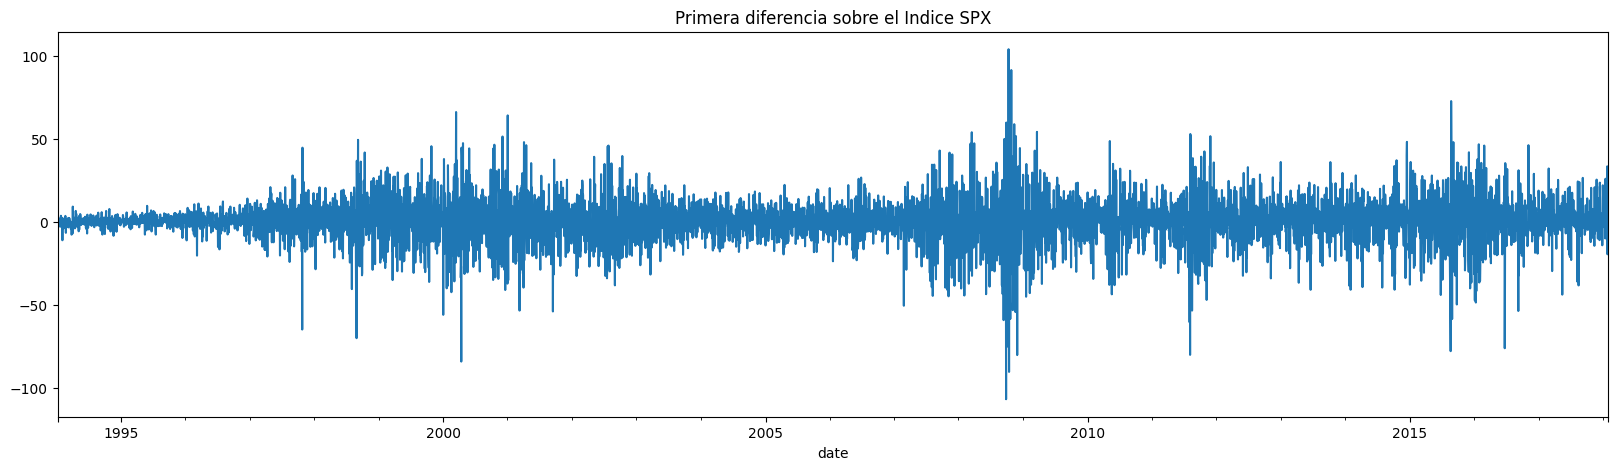

In [ ]:
#grafico este indice con las diferencias aplicadas fila a fila
df_comp.primera_diffs_spx.plot(figsize=(20,5), title = "Primera diferencia sobre el Indice SPX")
plt.show()

*COMENTARIO NUEVO 4*

En este caso, vemos la grafica de la primera diferencia de la serie original. Nos muestra una caracteristia del Ruido blanco ( White noise ).

Caracteristicas generales White noise =

- TIENE REVERSION A LA MEDIA
- VALOR ESPERADO CONSTANTE = 0
- VOLATILIDAD CONSTANTE EN EL TIEMPO



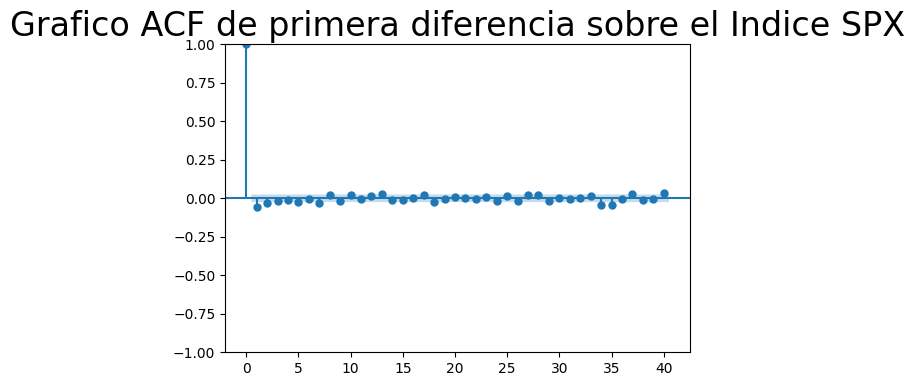

In [ ]:
plot_acf(df_comp.primera_diffs_spx,lags=40)
plt.title("Grafico ACF de primera diferencia sobre el Indice SPX", size= 24)
plt.show()

*COMENTARIO NUEVO 5*

En este caso, vemos la funcion de autocorrelacion de la primera diferencia de la serie original.
Vemos el cambio sustancial con respecto a la serie original. El mismo nos podria dar a la interpretacion que estamos en presencia de una serie estacionaria. Recordamos que siempre hay que testear para llegar a la conclusion definitiva.


Ruido Blanco

In [ ]:
wn = np.random.normal(loc = df_comp.spx.mean(), scale = df_comp.spx.std(), size = len(df_comp))
df_comp['wn'] = wn
df_comp.describe()

,spx,dax,ftse,nikkei,primera_diffs_spx,wn
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,0.379740,1281.548411
std,487.868210,2755.563853,1145.616719,4043.795272,13.552138,486.213486
min,438.920000,1911.700000,2876.600000,7054.980000,-106.621812,-541.983592
25%,992.715221,4070.460000,4486.730000,10701.130000,-5.194203,949.236069
50%,1233.761241,5774.260000,5663.300000,15030.510000,0.305038,1279.621745
75%,1460.250000,7445.560000,6304.630175,17860.470000,6.586405,1610.970217
max,2872.867839,13559.600000,7778.637689,24124.150000,104.136873,3262.068717


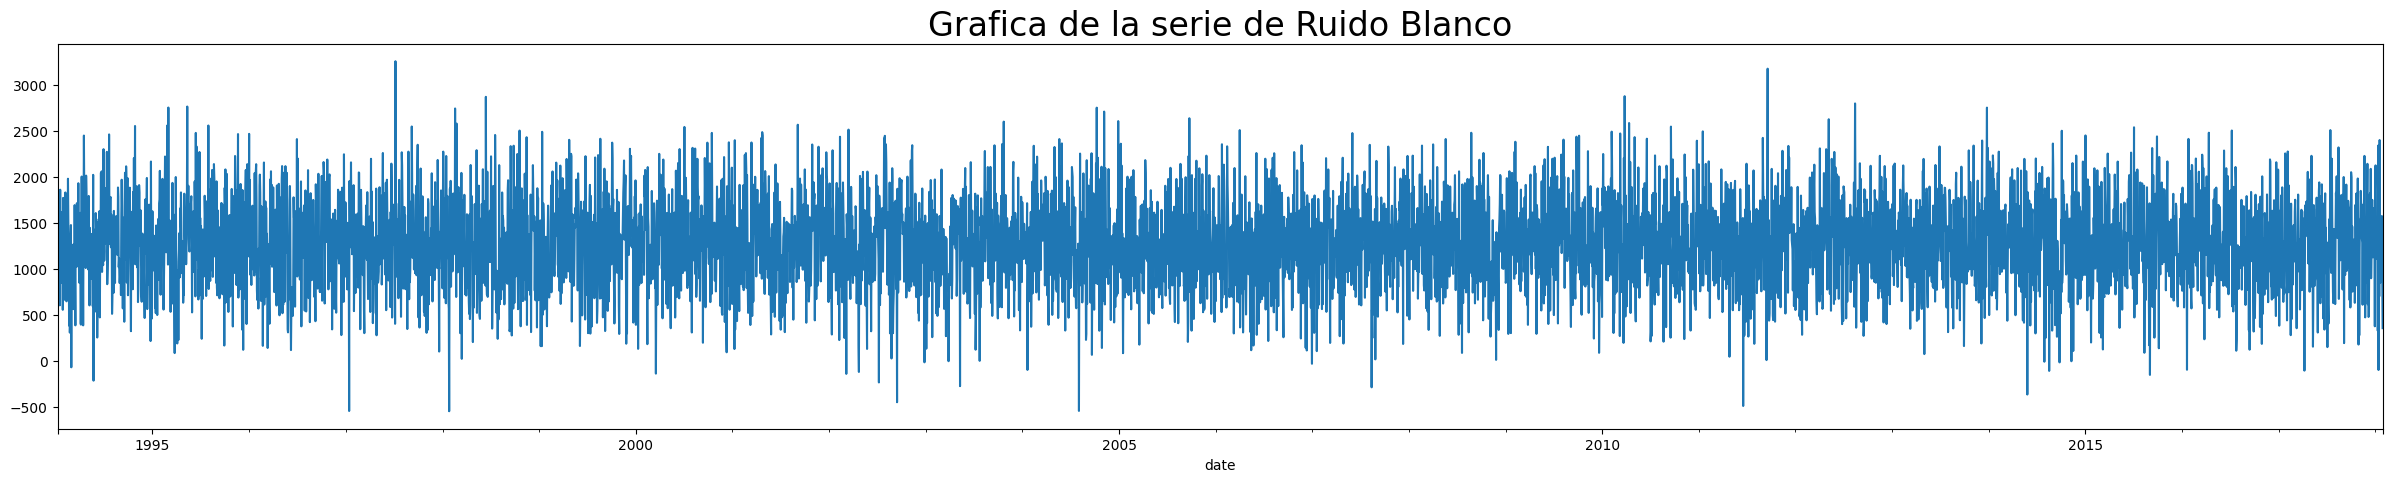

In [ ]:
df_comp.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco", size= 24)
plt.show()

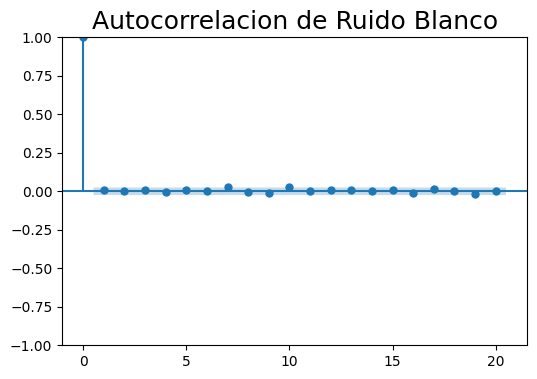

In [ ]:
plot_acf(df_comp.wn, lags=20)
plt.title("Autocorrelacion de Ruido Blanco", size= 18)
plt.show()

Random Walk

In [ ]:
# Simulamos el proceso
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [ ]:
random_walk[:10]

array([ 0.        , -0.2429927 ,  0.86906429,  0.01935054,  0.16751028,
        0.09587586,  1.35863055,  1.06246602,  1.00708139,  1.06443847])

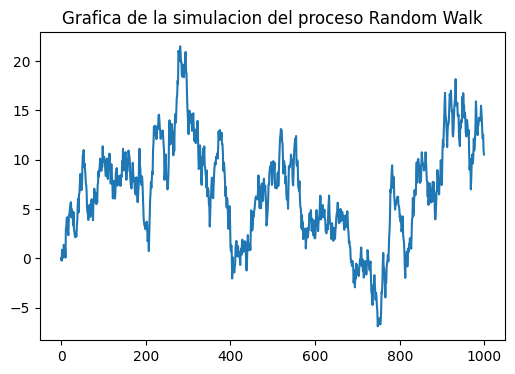

In [ ]:
plt.plot(random_walk)
plt.title("Grafica de la simulacion del proceso Random Walk")
plt.show()

*COMENTARIO NUEVO 6*

Una vez mas, la grafica simulada del proceso Random Walk, nos muestra una grafica similar a la serie de proceso de precios anterior, ya explicada.


In [ ]:
random_walk_acf_coef = acf(random_walk)
random_walk_acf_coef

array([1.        , 0.97964768, 0.95982759, 0.9403022 , 0.92231768,
       0.90341773, 0.88518425, 0.86853194, 0.85082584, 0.83302676,
       0.81407355, 0.79638815, 0.77904903, 0.76253053, 0.74661962,
       0.7303296 , 0.71472397, 0.69643724, 0.67836459, 0.66058778,
       0.6443194 , 0.6289838 , 0.61358063, 0.5992974 , 0.58686672,
       0.57710455, 0.56831485, 0.55789704, 0.54787675, 0.53721863,
       0.5302112 ])

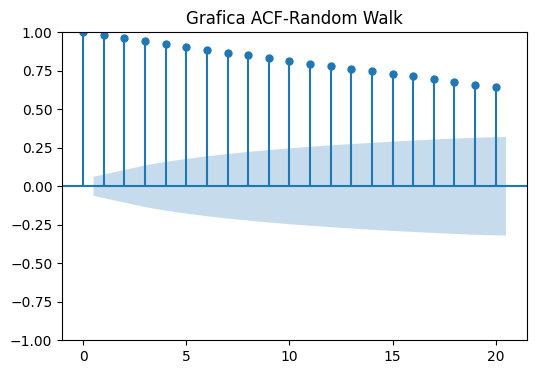

In [ ]:
plot_acf(random_walk, lags=20)
plt.title("Grafica ACF-Random Walk")
plt.show()

<body>
  <h1> Muchas gracias! 😀</h1>
</body>